In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing

from sklearn.preprocessing import StandardScaler

### NOT ALL PACKAGES WILL BE USED, WILL BE EDITED AS I GO

# Model tuning, model selection

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score


# metrics and evaluation

from sklearn.metrics import mean_squared_error, r2_score

import dmba
from dmba import classificationSummary, gainsChart, liftChart, regressionSummary, stepwise_selection, plotDecisionTree
from dmba.metric import AIC_score, adjusted_r2_score, BIC_score

# regression models
from sklearn.linear_model import LinearRegression

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor


# classification models

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [91]:
# importing data

qb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide_filtered.csv", index_col = 0)
rb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide_filtered.csv", index_col = 0)
wr = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide_filtered.csv", index_col = 0)
te = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide_filtered.csv", index_col = 0)

In [92]:
# lets focus on QBs first



qb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide.csv", index_col = 0)

qb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,adp_2023,age_2019,age_2020,age_2021,age_2022,age_2023,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,aggressiveness_2023,attempts_2019,attempts_2020,attempts_2021,attempts_2022,attempts_2023,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_distance_2023,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_differential_2023,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_air_yards_to_sticks_2023,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_completed_air_yards_2023,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_intended_air_yards_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_time_to_throw_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,completion_percentage_above_expectation_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,epa_total_2023,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,exp_sack_2023,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_completion_percentage_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_2023,int_2019,int_2020,int_2021,int_2022,int_2023,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,interceptions_2023,losses_2019,losses_2020,losses_2021,losses_2022,losses_2023,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_air_distance_2023,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,max_completed_air_distance_2023,next_season_2019,next_season_2020,next_season_2021,next_season_2022,next_season_2023,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,non_pass_tds_2023,offense_2019,offense_2020,offense_2021,offense_20

In [93]:
pd.set_option('display.max_columns', None)

qb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,adp_2023,age_2019,age_2020,age_2021,age_2022,age_2023,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,aggressiveness_2023,attempts_2019,attempts_2020,attempts_2021,attempts_2022,attempts_2023,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_distance_2023,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_differential_2023,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_air_yards_to_sticks_2023,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_completed_air_yards_2023,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_intended_air_yards_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_time_to_throw_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,completion_percentage_above_expectation_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,epa_total_2023,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,exp_sack_2023,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_completion_percentage_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_2023,int_2019,int_2020,int_2021,int_2022,int_2023,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,interceptions_2023,losses_2019,losses_2020,losses_2021,losses_2022,losses_2023,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_air_distance_2023,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,max_completed_air_distance_2023,next_season_2019,next_season_2020,next_season_2021,next_season_2022,next_season_2023,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,non_pass_tds_2023,offense_2019,offense_2020,offense_2021,offense_20

In [94]:
years = ['2019', '2020', '2021', '2022']

# Generate the list of column names using list comprehension and str.replace()
last_yr_team_stats = [base_column + year for year in years for base_column in \
           ['totyd_last_yr_tm_stat_', 'pts_scored_last_yr_tm_stat_', 'rushy_last_yr_tm_stat_',
           'passy_last_yr_tm_stat_']]

dfs = [qb, rb, wr, te]

for i in dfs:
    i[last_yr_team_stats] = i[last_yr_team_stats].replace(0, np.nan)

### Initial modeling

Let's try models that don't need too much pre-processing like decision trees and then random forests.

2022 will be the testing year. 2019, 2020, and 2021 data will be used to train the model.

Is there a way to, perhaps, train a model on 2019 data to predict 2020 scores, save what it knows about that, then 2020 to predict 2021, then 2021 to 2022 and aggergate the model's knowledge of how one year will affect the next?

In [95]:
nulls = {'te_prem_pts_pg_5ptd_2019': 0, 'te_prem_pts_pg_5ptd_2020': 0,'te_prem_pts_pg_5ptd_2021': 0,
                             'te_prem_pts_pg_5ptd_2022': 0 , 'te_prem_pts_p5td_2019': 0, 'te_prem_pts_p5td_2020': 0 ,
                             'te_prem_pts_p5td_2021': 0, 'te_prem_pts_p5td_2022': 0}

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

qb.loc[:, subset] = qb.loc[:, subset].fillna(0)
rb.loc[:, subset] = rb.loc[:, subset].fillna(0)
wr.loc[:, subset] = wr.loc[:, subset].fillna(0)
te.loc[:, subset] = te.loc[:, subset].fillna(0)

## 2023 data to utilize in model to make 2023 predictions

In [96]:
### utilizing beautifulsoup to scrape ff22 data!

import requests
from bs4 import BeautifulSoup

# 2023 rankings (current year)

# URL of the website
rank_url = "https://fantasyfootballcalculator.com/adp/half-ppr/12-team/all"

# Send a GET request to the URL
response = requests.get(rank_url)

# Create a BeautifulSoup object with the content of the response
soup = BeautifulSoup(response.content, 'html.parser')

# Find the main table on the page
table = soup.find("table", class_="table adp")

# Find all rows in the table (excluding the header row)
rows = table.find_all("tr")[1:]

# Define lists to store the data
data = []
header = []

# Extract the column names from the header row
for th in table.find_all("th"):
    header.append(th.text.strip())

# Iterate over each row and extract the data
for row in rows:
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

# Create a DataFrame from the data
ranks_23 = pd.DataFrame(data, columns=header)

# Print the DataFrame
print(ranks_23)

       #   Pick                      Name  Pos Team Bye Overall Std.Dev  \
0      1   1.01       Christian McCaffrey   RB   SF   9     1.4     0.7   
1      2   1.02             Austin Ekeler   RB  LAC   5     2.2     0.8   
2      3   1.02          Justin Jefferson   WR  MIN  13     2.2     0.9   
3      4   1.04             Ja'Marr Chase   WR  CIN   7     4.0     1.2   
4      5   1.05            Saquon Barkley   RB  NYG  13     5.1     1.3   
5      6   1.05            Bijan Robinson   RB   FA  12     5.5     1.6   
6      7   1.07           Jonathan Taylor   RB  IND  11     7.0     1.7   
7      8   1.08              Travis Kelce   TE   KC  10     7.8     2.2   
8      9   1.08             Derrick Henry   RB  TEN   7     7.8     1.9   
9     10   1.10                Nick Chubb   RB  CLE   5     9.6     2.5   
10    11   1.10               Cooper Kupp   WR  LAR  10    10.2     2.8   
11    12   1.10               Josh Jacobs   RB   LV  13    10.2     2.1   
12    13   1.12          

In [97]:
# let's keep only relevant positions (QB, RB, WR, and TE)

ranks_23 = ranks_23.loc[ranks_23['Pos'].isin(['QB', 'RB', 'TE', 'WR'])]

# let's keep only relevant columns
ranks_23 = ranks_23[['#', 'Name', 'Pos', 'Team']]
ranks_23.rename(columns = {'#': 'adp'}, inplace = True)

ranks_23 = ranks_23.set_index('Name')

In [98]:
ranks_23.head()

,adp,Pos,Team
Name,,,
Christian McCaffrey,1,RB,SF
Austin Ekeler,2,RB,LAC
Justin Jefferson,3,WR,MIN
Ja'Marr Chase,4,WR,CIN
Saquon Barkley,5,RB,NYG


In [99]:
qb = qb.join(ranks_23['adp'], how = 'left')
rb = rb.join(ranks_23['adp'], how = 'left')
wr = wr.join(ranks_23['adp'], how = 'left')
te = te.join(ranks_23['adp'], how = 'left')

# dropping old adp_2023 added from earlier notebook
qb.drop(columns = ['adp_2023'], inplace = True)
rb.drop(columns = ['adp_2023'], inplace = True)
wr.drop(columns = ['adp_2023'], inplace = True)
te.drop(columns = ['adp_2023'], inplace = True)

qb.rename(columns = {'adp': 'adp_2023'}, inplace = True)
rb.rename(columns = {'adp': 'adp_2023'}, inplace = True)
wr.rename(columns = {'adp': 'adp_2023'}, inplace = True)
te.rename(columns = {'adp': 'adp_2023'}, inplace = True)

In [100]:
qb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,age_2023,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,aggressiveness_2023,attempts_2019,attempts_2020,attempts_2021,attempts_2022,attempts_2023,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_distance_2023,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_differential_2023,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_air_yards_to_sticks_2023,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_completed_air_yards_2023,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_intended_air_yards_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_time_to_throw_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,completion_percentage_above_expectation_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,epa_total_2023,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,exp_sack_2023,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_completion_percentage_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_2023,int_2019,int_2020,int_2021,int_2022,int_2023,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,interceptions_2023,losses_2019,losses_2020,losses_2021,losses_2022,losses_2023,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_air_distance_2023,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,max_completed_air_distance_2023,next_season_2019,next_season_2020,next_season_2021,next_season_2022,next_season_2023,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,non_pass_tds_2023,offense_2019,offense_2020,offense_2021,offense_2022,offens

### QB Modeling

Setting up a loop to continually train a model on season data for the following year. Starting with 2019 as training data until 2021, and test data used as the following years.

In [101]:
## Modeling

# setting for reproducibility

np.random.seed(11)

# getting qb relevant stats
stats = ['adp', 'age', 'avg_intended_air_yards', 'completion_percentage_above_expectation',
         'rushingatt', 'epa_total', 'te_prem_pts_pg_5ptd', 'passy_last_yr_tm_stat']
target_seasons = ['2020', '2021', '2022']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train = qb[[f'{stat}_{previous_season}' for stat in stats]]
    y_train = qb[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()

    # Step 2: Train the Regression Models
    # Choose the regression model you want to use
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Step 3: Make Predictions
    X_test = qb[[f'{stat}_{current_season}' for stat in stats]]
    y_pred = model.predict(X_test)

    # Step 4: Combine Predictions
    qb[f'fantasypoints_pg_{current_season}'] = y_pred
    
    # evaluating the models
    
    y_test = qb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {current_season} season:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("--------------------")
    
# The wide_df DataFrame now contains the predicted data for the 2022 season for each player.

C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2020
- age_2020
- avg_intended_air_yards_2020
- completion_percentage_above_expectation_2020
- epa_total_2020
- ...
Feature names seen at fit time, yet now missing:
- adp_2019
- age_2019
- avg_intended_air_yards_2019
- completion_percentage_above_expectation_2019
- epa_total_2019
- ...

  warnings.warn(message, FutureWarning)
C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2021
- age_2021
- avg_intended_air_yards_2021
- completion_percentage_above_expectation_2021
- epa_total_2021
- ...
Feature names seen at fit time, yet now missing:
- adp_2020
- age_2020
- avg_intended_air_

Metrics for 2020 season:
Mean Squared Error: 11.374583851039485
R-squared: 0.8253317445706672
--------------------
Metrics for 2021 season:
Mean Squared Error: 15.139336021291358
R-squared: 0.7220730339640704
--------------------
Metrics for 2022 season:
Mean Squared Error: 10.929726175024667
R-squared: 0.7956868294495741
--------------------


C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2022
- age_2022
- avg_intended_air_yards_2022
- completion_percentage_above_expectation_2022
- epa_total_2022
- ...
Feature names seen at fit time, yet now missing:
- adp_2021
- age_2021
- avg_intended_air_yards_2021
- completion_percentage_above_expectation_2021
- epa_total_2021
- ...

  warnings.warn(message, FutureWarning)


In [187]:
# trying again, but seeing if we can include some 'current' season features (like, age or experience, and adp)

# setting for reproducibility

np.random.seed(11)

# getting qb relevant stats
past_qb_stats = ['avg_intended_air_yards', 'ttl_opp',  'completion_percentage_above_expectation',
         'rushingatt', 'epa_total', 'te_prem_pts_pg_5ptd', 'adp']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year

current_qb_stats = ['age',  'passy_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = qb[[f'{stat}_{previous_season}' for stat in past_qb_stats]]
    X_train_c = qb[[f'{stat}_{current_season}' for stat in current_qb_stats]]
    
    column_names_p = X_train_p.columns.tolist()
    column_names_c = X_train_c.columns.tolist()
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    sc = StandardScaler()

    qb_trans_tr = sc.fit_transform(X_test)

    qb_trans_tr = pd.DataFrame(qb_trans_tr, columns = X_test.columns)
    
    if current_season != '2023':
        y_train = qb[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = qb[[f'{stat}_{previous_season}' for stat in past_qb_stats]]
        X_test_c = qb[[f'{stat}_{current_season}' for stat in current_qb_stats]]
        X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        qb[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = qb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
        
        
    else:
        predictions_23 = model.predict(X_train)
        qb[f'fantasypoints_pg_{current_season}'] = predictions_23
    X_train.columns = column_names_p + column_names_c
    
    

Metrics for 2020 season:
Mean Squared Error: 9.097029424499164
R-squared: 0.8603058995409869
--------------------
Metrics for 2021 season:
Mean Squared Error: 7.653467777356919
R-squared: 0.8594981262042746
--------------------
Metrics for 2022 season:
Mean Squared Error: 6.073707047380766
R-squared: 0.8864620829494816
--------------------


In [188]:
# trying again, but seeing if we can include some 'current' season features (like, age or experience, and adp)

# setting for reproducibility

np.random.seed(11)

# can we get use another season of data?


# getting qb relevant stats
past_qb_stats = ['avg_intended_air_yards', 'ttl_opp',  'completion_percentage_above_expectation',
         'rushingatt', 'epa_total', 'te_prem_pts_pg_5ptd']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year

current_qb_stats = ['age',  'passy_last_yr_tm_stat']


target_seasons = ['2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    previous_season_2 = str(int(current_season) - 2)
    
    y = 'te_prem_pts_pg_5ptd'
        
    X_train_p = qb[[f'{stat}_{previous_season}' for stat in past_qb_stats]]
    X_train_c = qb[[f'{stat}_{current_season}' for stat in current_qb_stats]]
    
    X_train_p2 = qb[[f'{stat}_{previous_season_2}' for stat in past_qb_stats]]
    
    column_names_p = X_train_p.columns.tolist()
    column_names_c = X_train_c.columns.tolist()
    column_names_p2 = X_train_p2.columns.tolist()
    
    
    X_train = pd.concat([X_train_p, X_train_c, X_train_p2], axis = 1, ignore_index = True)
    
    sc = StandardScaler()

    qb_trans_tr = sc.fit_transform(X_train)

    qb_trans_tr = pd.DataFrame(qb_trans_tr, columns = X_train.columns)
    
    if current_season != '2023':
        y_train = qb[[f'{y}_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = qb[[f'{stat}_{previous_season}' for stat in past_qb_stats]]
        X_test_p2 = qb[[f'{stat}_{previous_season_2}' for stat in past_qb_stats]]
        X_test_c = qb[[f'{stat}_{current_season}' for stat in current_qb_stats]]
        X_test = pd.concat([X_test_p, X_test_c, X_test_p2], axis = 1, ignore_index = True)
        
        sc = StandardScaler()

        qb_trans_tst = sc.fit_transform(X_test)

        qb_trans_tst = pd.DataFrame(qb_trans_tst, columns = X_test.columns)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        qb[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = qb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
        
        
    else:
        predictions_23 = model.predict(X_train)
        qb[f'fantasypoints_pg_{current_season}'] = predictions_23
    X_train.columns = column_names_p + column_names_c + column_names_p2
    
    

Metrics for 2021 season:
Mean Squared Error: 6.4666042983701955
R-squared: 0.8812864903273593
--------------------
Metrics for 2022 season:
Mean Squared Error: 4.536840111462305
R-squared: 0.915191270795847
--------------------


In [189]:
# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

                                         Feature  Importance
6                                       age_2023    9.815057
3                                rushingatt_2022    5.736694
7                     passy_last_yr_tm_stat_2023    5.320527
1                                   ttl_opp_2022    4.895358
4                                 epa_total_2022    4.408423
8                    avg_intended_air_yards_2021    2.859032
5                       te_prem_pts_pg_5ptd_2022    2.484578
2   completion_percentage_above_expectation_2022    2.416260
10  completion_percentage_above_expectation_2021    0.950529
11                               rushingatt_2021    0.744340
9                                   ttl_opp_2021    0.694546
0                    avg_intended_air_yards_2022    0.603408
13                      te_prem_pts_pg_5ptd_2021    0.586446
12                                epa_total_2021    0.132127


Adding in current years experience and adp, it really helped make an even better predictor with R-squared of .852, MSE = 9.90.


In [105]:
pd.set_option('display.max_rows', None)

qb[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']]

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
AJ McCarron,0.000000,-0.274229,0.000000,-1.280110,0.000000,0.196803
Aaron Rodgers,26.922500,23.932344,23.112500,20.904777,15.364706,14.968723
Alex McGough,0.000000,-0.539256,0.000000,-0.039882,0.000000,0.297154
Alex Smith,9.697500,4.620454,0.000000,0.118159,0.000000,-0.454415
Alex Tanney,0.000000,1.162249,0.000000,1.932227,0.000000,-0.794009
Andrew Luck,0.000000,0.301503,0.000000,0.074483,0.000000,0.070432
Andy Dalton,13.672727,12.769717,11.025000,10.843661,13.588571,10.549991
Anthony Brown,0.000000,0.578927,0.000000,0.763507,2.790000,7.395819
Anthony Gordon,0.000000,1.261898,0.000000,0.375242,0.000000,0.196803


In [106]:
# PREDICTIONS FOR 2023

qb_preds_1 = qb[['fantasypoints_pg_2023', 'adp_2023']].sort_values('fantasypoints_pg_2023', ascending = False).head(35)

qb_preds_1['pos'] = 'QB'
# need team in there, that'd be helpful

qb_preds_1

,fantasypoints_pg_2023,adp_2023,pos
player_name,,,
Josh Allen,22.556819,34,QB
Jalen Hurts,22.254460,39,QB
Daniel Jones,21.023702,130,QB
Joe Burrow,20.109784,53,QB
Justin Fields,19.783870,75,QB
Justin Herbert,19.335368,58,QB
Tua Tagovailoa,19.137924,91,QB
Lamar Jackson,18.734426,62,QB
Trevor Lawrence,18.315306,81,QB


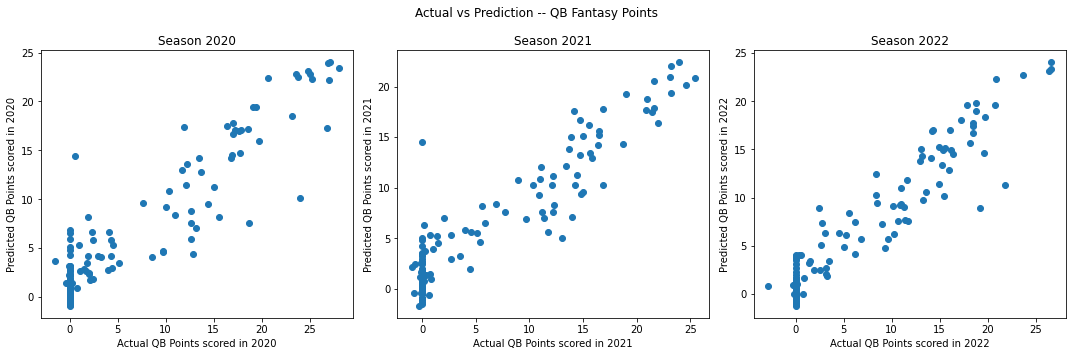

In [107]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- QB Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(qb[f'te_prem_pts_pg_5ptd_{year}'], qb[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual QB Points scored in {year}')
    ax.set_ylabel(f'Predicted QB Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

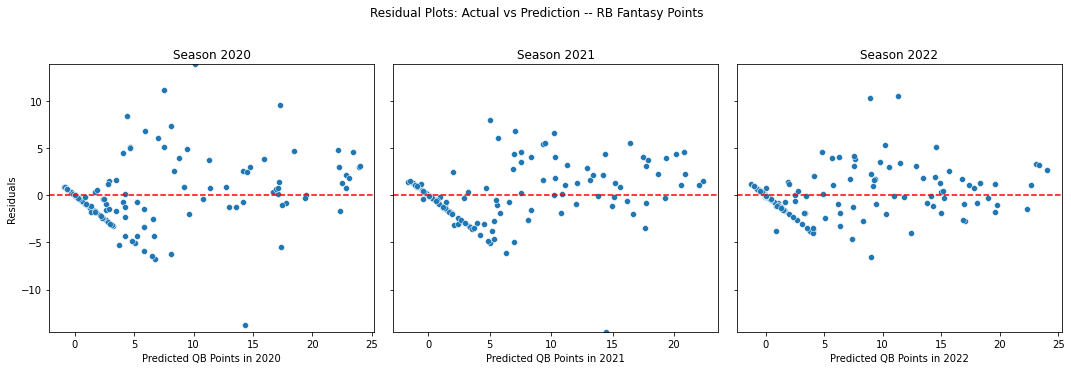

In [108]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = qb[f'te_prem_pts_pg_5ptd_{year}'] - qb[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- RB Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = qb[f'te_prem_pts_pg_5ptd_{year}'] - qb[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=qb[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted QB Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


This model is providing decent results so far, and it seems to get stronger as there is more year by year data. Let's try this same thing with RBs.

### RB Initial Modeling

In [109]:
rb.shape

(131, 425)

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='te_prem_pts_p5td_2022'>

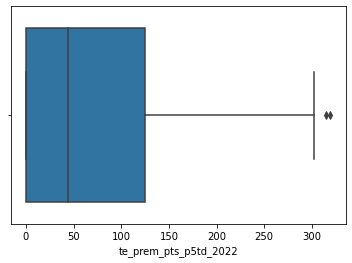

In [110]:
sns.boxplot(rb['te_prem_pts_p5td_2022'])

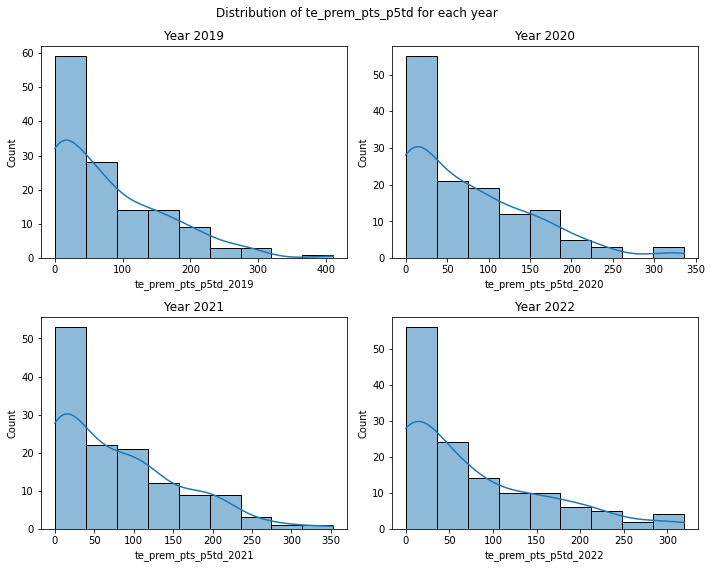

In [111]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Distribution of te_prem_pts_p5td for each year')

# Iterate through each year and create the histogram in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(rb[f'te_prem_pts_p5td_{year}'], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Year {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [112]:
y_pred_shuffled

array([ 1.96803480e-01,  1.39885902e+01,  5.57685587e-01, -5.71779630e-01,
       -7.94008577e-01,  7.04320063e-02,  1.01420388e+01,  7.39581930e+00,
        1.96803480e-01,  9.30734418e+00,  1.08549539e+01, -1.43804162e-01,
        3.70453360e+00,  4.91337674e+00, -6.84973979e-01, -5.10986943e-03,
       -6.12512939e-01,  4.86834316e+00,  2.74755864e+00, -4.10376050e-01,
        9.98142959e+00,  1.89492970e+00,  3.53282985e-01,  1.39467543e-01,
        4.88675883e-01,  1.48097017e+01,  7.04320063e-02,  3.19142002e-01,
       -8.90234955e-01,  7.04320063e-02,  7.04320063e-02,  1.53046548e+00,
        4.61941439e-01,  4.61941439e-01,  1.64305724e+00,  6.10772659e+00,
        7.19652340e-01,  1.04954069e+00,  9.01953367e+00,  5.74964833e+00,
        1.68492504e+01,  1.85193507e+01, -3.90426890e-01,  5.59921578e+00,
        4.77132900e-01,  1.49971753e+01,  1.13358254e+01,  2.97154063e-01,
        1.45563380e+01,  8.95802025e+00,  9.51660874e+00,  2.67122034e+00,
        7.04320063e-02, -

In [113]:
# filling nulls similarly as before

# lets replace those 0s with nulls

season = ['2019', '2020', '2021', '2022']

for i in range(len(season)):
    year = season[i]
    rb[[f'adp_{year}']] = rb[[f'adp_{year}']].replace(0, np.nan)

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

rb.loc[:, subset] = rb.loc[:, subset].fillna(0)

In [114]:
rb.adp_2023

player_name
Aaron Jones               31
Adrian Peterson          NaN
Alex Collins             NaN
Alexander Mattison        47
Alvin Kamara              60
Ameer Abdullah           NaN
Antonio Gibson            83
Austin Ekeler              2
Benny Snell              NaN
Bo Scarbrough            NaN
Boston Scott             NaN
Brandon Bolden           NaN
Breece Hall               22
Brian Hill               NaN
Caleb Huntley            NaN
Cam Akers                 46
Carlos Hyde              NaN
Chase Edmonds            136
Chris Carson             NaN
Chris Thompson           NaN
Christian McCaffrey        1
Chuba Hubbard            172
Clyde Edwards-Helaire    135
Cordarrelle Patterson    119
D'Andre Swift             45
D'Ernest Johnson         203
D'Onta Foreman           NaN
Dalvin Cook               30
Dameon Pierce             37
Damien Harris             88
Damien Williams          NaN
Dare Ogunbowale          NaN
Darrel Williams          NaN
Darrell Henderson        NaN
Da

### RB Model

In [115]:
# using 'current' season features (like, age or experience, and adp)

# setting for reproducibility

np.random.seed(11)

# getting qb relevant stats
past_stats = ['ttl_opp', 'receivingyds', 'rush_pct_over_expected', 'te_prem_pts_pg_5ptd']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'rushy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = rb[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = rb[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = rb[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = rb[[f'{stat}_{current_season}' for stat in past_stats]]
        X_test_c = rb[[f'{stat}_{current_season}' for stat in current_stats]]
        X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        rb[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = rb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
    else:
        predictions_23 = model.predict(X_train)
        rb[f'fantasypoints_pg_{current_season}'] = predictions_23
    

Metrics for 2020 season:
Mean Squared Error: 9.216503092876417
R-squared: 0.716036675413559
--------------------
Metrics for 2021 season:
Mean Squared Error: 8.029848429465288
R-squared: 0.7233905693995257
--------------------
Metrics for 2022 season:
Mean Squared Error: 3.5292189440223845
R-squared: 0.8688499955604673
--------------------


In [131]:
# trying again, but seeing if we can include some 'current' season features (like, age or experience, and adp)

# setting for reproducibility

np.random.seed(11)

# can we get use another season of data?


# getting qb relevant stats
past_rb_stats = ['ttl_opp', 'receivingyds', 'rush_pct_over_expected', 'te_prem_pts_pg_5ptd']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year
current_rb_stats = ['age', 'adp', 'rushy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    previous_season_2 = str(int(current_season) - 2)
    
    y = 'te_prem_pts_pg_5ptd'
        
    X_train_p = rb[[f'{stat}_{previous_season}' for stat in past_rb_stats]]
    X_train_c = rb[[f'{stat}_{current_season}' for stat in current_rb_stats]]
    
    X_train_p2 = rb[[f'{stat}_{previous_season_2}' for stat in past_rb_stats]]
    
    column_names_p = X_train_p.columns.tolist()
    column_names_c = X_train_c.columns.tolist()
    column_names_p2 = X_train_p2.columns.tolist()
    
    
    X_train = pd.concat([X_train_p, X_train_c, X_train_p2], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = rb[[f'{y}_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = rb[[f'{stat}_{previous_season}' for stat in past_rb_stats]]
        X_test_p2 = rb[[f'{stat}_{previous_season_2}' for stat in past_rb_stats]]
        X_test_c = rb[[f'{stat}_{current_season}' for stat in current_rb_stats]]
        X_test = pd.concat([X_test_p, X_test_c, X_test_p2], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        rb[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = rb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
        
        
    else:
        predictions_23 = model.predict(X_train)
        rb[f'fantasypoints_pg_{current_season}'] = predictions_23
    X_train.columns = column_names_p + column_names_c + column_names_p2
    
    

Metrics for 2021 season:
Mean Squared Error: 3.3181286687853264
R-squared: 0.8856982557274824
--------------------
Metrics for 2022 season:
Mean Squared Error: 1.7421458233572606
R-squared: 0.9352597738786905
--------------------


In [143]:
# PREDICTIONS FOR 2023

rb_preds_1 = rb[['fantasypoints_pg_2023', 'adp_2023']].sort_values('fantasypoints_pg_2023', ascending = False).head(50)

rb_preds_1['pos'] = 'RB'
# need team in there, that'd be helpful

rb_preds_1.head(10)

,fantasypoints_pg_2023,adp_2023,pos
player_name,,,
Derrick Henry,15.166556,9,RB
Nick Chubb,14.728728,10,RB
Dalvin Cook,14.458386,30,RB
Austin Ekeler,14.218869,2,RB
Christian McCaffrey,14.180688,1,RB
Joe Mixon,13.301658,23,RB
Josh Jacobs,13.217798,12,RB
Aaron Jones,12.750618,31,RB
Breece Hall,12.745241,22,RB


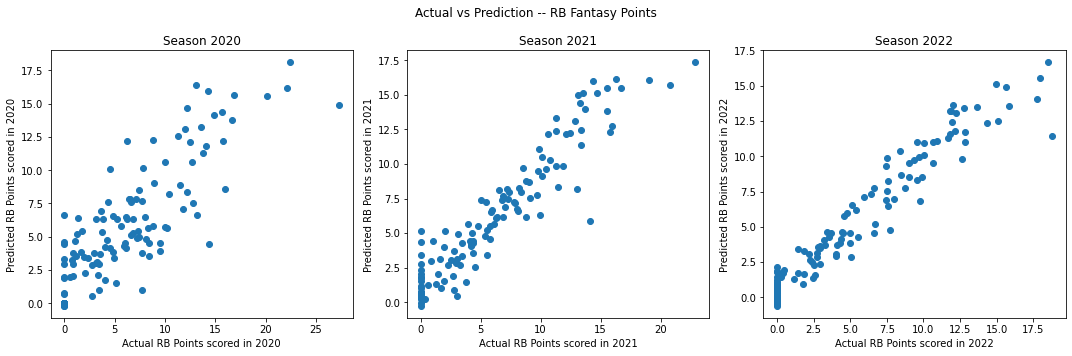

In [144]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- RB Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(rb[f'te_prem_pts_pg_5ptd_{year}'], rb[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual RB Points scored in {year}')
    ax.set_ylabel(f'Predicted RB Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()




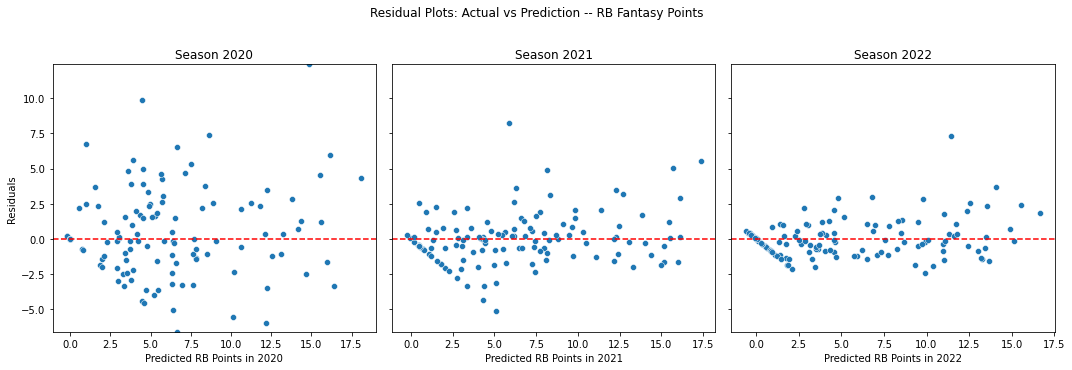

In [145]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = rb[f'te_prem_pts_pg_5ptd_{year}'] - rb[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- RB Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = rb[f'te_prem_pts_pg_5ptd_{year}'] - rb[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=rb[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted RB Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [146]:

# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

                                     Feature  Importance
7                                   adp_2023    7.593730
6                                   age_2023    2.176302
8                 passy_last_yr_tm_stat_2023    1.353466
3                           yds_per_opp_2022    1.307968
5                   te_prem_pts_pg_5ptd_2022    1.300609
10                              ttl_opp_2021    1.034378
4                      catch_percentage_2022    0.988147
0                               ttl_opp_2022    0.902528
14                     catch_percentage_2021    0.640284
11  percent_share_of_intended_air_yards_2021    0.506216
2                               avg_yac_2022    0.444017
9            pts_scored_last_yr_tm_stat_2023    0.375639
12                              avg_yac_2021    0.357269
1   percent_share_of_intended_air_yards_2022    0.336140
15                  te_prem_pts_pg_5ptd_2021    0.281292
13                          yds_per_opp_2021    0.243104


These too seem to be getting better as the model sees more seasons.

# WR

In [83]:
wr.head()

,1std_2019,1std_2020,1std_2021,1std_2022,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,avg_cushion_2019,avg_cushion_2020,avg_cushion_2021,avg_cushion_2022,avg_expected_yac_2019,avg_expected_yac_2020,avg_expected_yac_2021,avg_expected_yac_2022,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_separation_2019,avg_separation_2020,avg_separation_2021,avg_separation_2022,avg_yac_2019,avg_yac_2020,avg_yac_2021,avg_yac_2022,avg_yac_above_expectation_2019,avg_yac_above_expectation_2020,avg_yac_above_expectation_2021,avg_yac_above_expectation_2022,catch_percentage_2019,catch_percentage_2020,catch_percentage_2021,catch_percentage_2022,cmp_2019,cmp_2020,cmp_2021,cmp_2022,defense_2019,defense_2020,defense_2021,defense_2022,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,g_2019,g_2020,g_2021,g_2022,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,gs_2019,gs_2020,gs_2021,gs_2022,height_2019,height_2020,height_2021,height_2022,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,int_2019,int_2020,int_2021,int_2022,losses_2019,losses_2020,losses_2021,losses_2022,next_season_2019,next_season_2020,next_season_2021,next_season_2022,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,offense_2019,offense_2020,offense_2021,offense_2022,passingatt_2019,passingatt_2020,passingatt_2021,passingatt_2022,passingtd_2019,passingtd_2020,passingtd_2021,passingtd_2022,passingyds_2019,passingyds_2020,passingyds_2021,passingyds_2022,passy_2019,passy_2020,passy_2021,passy_2022,passy_last_yr_tm_stat_2019,passy_last_yr_tm_stat_2020,passy_last_yr_tm_stat_2021,passy_last_yr_tm_stat_2022,passyds_allowed_2019,passyds_allowed_2020,passyds_allowed_2021,passyds_allowed_2022,pct_gs_2019,pct_gs_2020,pct_gs_2021,pct_gs_2022,percent_share_of_intended_air_yards_2019,percent_share_of_intended_air_yards_2020,percent_share_of_intended_air_yards_2021,percent_share_of_intended_air_yards_2022,ppr_2019,ppr_2020,ppr_2021,ppr_2022,pts_allowed_2019,pts_allowed_2020,pts_allowed_2021,pts_allowed_2022,pts_scored_2019,pts_scored_2020,pts_scored_2021,pts_scored_2022,pts_scored_last_yr_tm_stat_2019,pts_scored_last_yr_tm_stat_2020,pts_scored_last_yr_tm_stat_2021,pts_scored_last_yr_tm_stat_2022,rec_2019,rec_2020,rec_2021,rec_2022,receivingtd_2019,receivingtd_2020,receivingtd_2021,receivingtd_2022,receivingyds_2019,receivingyds_2020,receivingyds_2021,receivingyds_2022,rookie_2019,rookie_2020,rookie_2021,rookie_2022,rushingatt_2019,rushingatt_2020,rushingatt_2021,rushingatt_2022,rushingtd_2019,rushingtd_2020,rushingtd_2021,rushingtd_2022,rushingyds_2019,rushingyds_2020,rushingyds_2021,rushingyds_2022,rushy_2019,rushy_2020,rushy_2021,rushy_2022,rushy_last_yr_tm_stat_2019,rushy_last_yr_tm_stat_2020,rushy_last_yr_tm_stat_2021,rushy_last_yr_tm_stat_2022,rushyds_allowed_2019,rushyds_allowed_2020,rushyds_allowed_2021,rushyds_allowed_2022,scrimyds_2019,scrimyds_2020,scrimyds_2021,scrimyds_2022,season_position_rank_2019,season_position_rank_2020,season_

In [84]:
# wr ADPs 

wr['adp_2020'].head(10)

player_name
A.J. Brown         46.0
A.J. Green         73.0
Adam Humphries      NaN
Adam Thielen       31.0
Albert Wilson       NaN
Alec Pierce         NaN
Alex Erickson       NaN
Allen Hurns         NaN
Allen Lazard      132.0
Allen Robinson     34.0
Name: adp_2020, dtype: float64

In [137]:
# replacing 0's in scoring data with nan's 

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

wr.loc[:, subset] = wr.loc[:, subset].fillna(0)

In [138]:
# using 'current' season features (like, age or experience, and adp)

# getting wr relevant stats
past_stats = ['ttl_opp', 'percent_share_of_intended_air_yards', 'avg_yac', 
              'yds_per_opp', 'catch_percentage', 'te_prem_pts_pg_5ptd']

# another feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'passy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = wr[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = wr[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = wr[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = wr[[f'{stat}_{current_season}' for stat in past_stats]]
        X_test_c = wr[[f'{stat}_{current_season}' for stat in current_stats]]
        X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        wr[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = wr[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
    else:
        predictions_23 = model.predict(X_train)
        wr[f'fantasypoints_pg_{current_season}'] = predictions_23
    

Metrics for 2020 season:
Mean Squared Error: 4.684666532047869
R-squared: 0.7997819858992857
--------------------
Metrics for 2021 season:
Mean Squared Error: 5.077546511743867
R-squared: 0.7584531346942602
--------------------
Metrics for 2022 season:
Mean Squared Error: 3.6291639000837805
R-squared: 0.8311779259681082
--------------------


In [139]:
# trying again, but seeing if we can include data from 2 years back. it seems to have helped QB and RB models

# setting for reproducibility

np.random.seed(11)

# can we get use another season of data?


# getting qb relevant stats
past_wr_stats = ['ttl_opp', 'percent_share_of_intended_air_yards', 'avg_yac', 
              'yds_per_opp', 'catch_percentage', 'te_prem_pts_pg_5ptd']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year
current_wr_stats = ['age', 'adp', 'passy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    previous_season_2 = str(int(current_season) - 2)
    
    y = 'te_prem_pts_pg_5ptd'
        
    X_train_p = wr[[f'{stat}_{previous_season}' for stat in past_wr_stats]]
    X_train_c = wr[[f'{stat}_{current_season}' for stat in current_wr_stats]]
    
    X_train_p2 = wr[[f'{stat}_{previous_season_2}' for stat in past_wr_stats]]
    
    column_names_p = X_train_p.columns.tolist()
    column_names_c = X_train_c.columns.tolist()
    column_names_p2 = X_train_p2.columns.tolist()
    
    
    X_train = pd.concat([X_train_p, X_train_c, X_train_p2], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = wr[[f'{y}_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = wr[[f'{stat}_{previous_season}' for stat in past_wr_stats]]
        X_test_p2 = wr[[f'{stat}_{previous_season_2}' for stat in past_wr_stats]]
        X_test_c = wr[[f'{stat}_{current_season}' for stat in current_wr_stats]]
        X_test = pd.concat([X_test_p, X_test_c, X_test_p2], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        wr[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = wr[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
        
        
    else:
        predictions_23 = model.predict(X_train)
        wr[f'fantasypoints_pg_{current_season}'] = predictions_23
    X_train.columns = column_names_p + column_names_c + column_names_p2
    
    

Metrics for 2021 season:
Mean Squared Error: 0.9563107616935892
R-squared: 0.9545067945294121
--------------------
Metrics for 2022 season:
Mean Squared Error: 0.8955874807885873
R-squared: 0.9583389066610533
--------------------


In [140]:
wr[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sample(10)

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
Kenny Golladay,11.160000,11.597949,5.042857,5.123129,1.425000,2.340205
Robby Anderson,10.912500,8.830385,6.588235,6.632250,0.000000,2.092526
Devin Duvernay,2.318750,2.504769,3.793750,4.082522,6.542857,5.320927
Rashard Higgins,7.876923,3.870466,3.033333,2.504757,0.000000,0.650792
Shi Smith,0.000000,0.260013,2.183333,3.967193,2.976471,3.523783
Julio Jones,13.400000,14.282243,6.490000,6.640168,5.840000,4.160268
Dede Westbrook,-0.550000,4.343863,0.786667,1.506736,0.000000,0.258243
Chris Conley,5.140000,1.907300,3.350000,3.233373,0.733333,1.166866
Scott Miller,5.375000,5.686623,1.844444,2.200486,2.053333,2.250146


In [141]:
# how did it do last year in prdicting ppg?

wr[['te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sort_values('fantasypoints_pg_2022', ascending = False)

,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,
Davante Adams,16.794118,16.548320
Justin Jefferson,17.803529,16.244626
Cooper Kupp,18.211111,16.079133
Ja'Marr Chase,16.575000,15.987790
Stefon Diggs,16.412500,15.231081
Tyreek Hill,16.570588,14.851807
A.J. Brown,15.035294,14.521211
CeeDee Lamb,14.594118,14.375415
DeAndre Hopkins,13.300000,13.372579


In [147]:
# PREDICTIONS FOR 2023

# PREDICTIONS FOR 2023

wr_preds_1 = wr[['fantasypoints_pg_2023', 'adp_2023']].sort_values('fantasypoints_pg_2023', ascending = False).head(60)

wr_preds_1['pos'] = 'WR'
# need team in there, that'd be helpful

wr_preds_1.head(10)

,fantasypoints_pg_2023,adp_2023,pos
player_name,,,
Amon-Ra St. Brown,16.296428,25,WR
Davante Adams,16.011629,18,WR
Justin Jefferson,15.800294,3,WR
Cooper Kupp,15.541360,11,WR
Tyreek Hill,15.403811,13,WR
CeeDee Lamb,15.213365,17,WR
Stefon Diggs,14.985074,14,WR
Jaylen Waddle,14.951719,24,WR
Tee Higgins,14.494526,28,WR


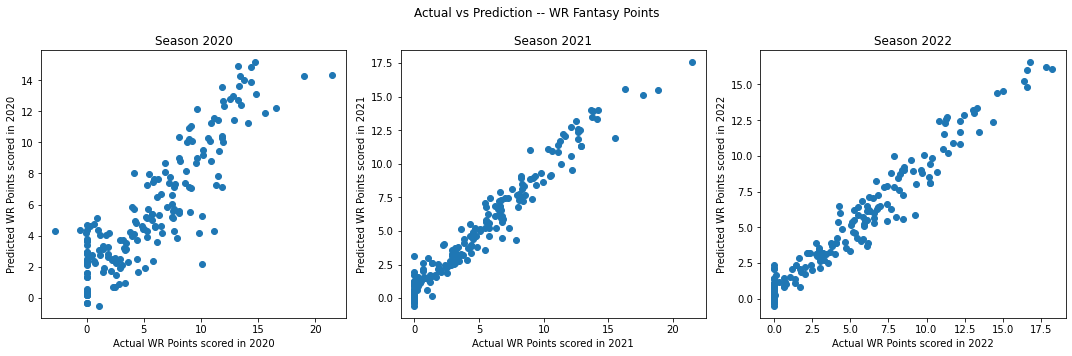

In [148]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- WR Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(wr[f'te_prem_pts_pg_5ptd_{year}'], wr[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual WR Points scored in {year}')
    ax.set_ylabel(f'Predicted WR Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

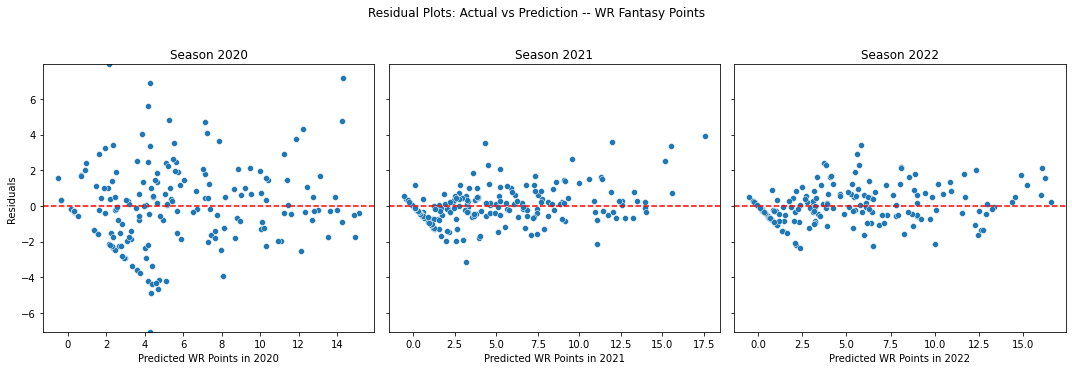

In [149]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = wr[f'te_prem_pts_pg_5ptd_{year}'] - wr[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- WR Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = wr[f'te_prem_pts_pg_5ptd_{year}'] - wr[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=wr[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted WR Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [150]:
# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

    Feature  Importance
7         7    7.593730
6         6    2.176302
8         8    1.353466
3         3    1.307968
5         5    1.300609
10       10    1.034378
4         4    0.988147
0         0    0.902528
14       14    0.640284
11       11    0.506216
2         2    0.444017
9         9    0.375639
12       12    0.357269
1         1    0.336140
15       15    0.281292
13       13    0.243104


## TE

In [151]:
# lets replace those 0s with nulls

season = ['2019', '2020', '2021', '2022']

for i in range(len(season)):
    year = season[i]
    te[[f'adp_{year}']] = te[[f'adp_{year}']].replace(0, np.nan)

te['adp_2020'].head()

player_name
Adam Shaheen            NaN
Adam Trautman           NaN
Albert Okwuegbunam      NaN
Anthony Firkser         NaN
Austin Hooper         136.0
Name: adp_2020, dtype: float64

In [153]:
# replacing 0's in scoring data with nan's 

te.loc[:, subset] = te.loc[:, subset].fillna(0)

In [154]:
# using 'current' season features (like, age or experience, and adp)

# let's trry with the same wr relevant stats
past_stats = ['ttl_opp', 'percent_share_of_intended_air_yards',
              'avg_yac', 'yds_per_opp', 'catch_percentage', 'te_prem_pts_pg_5ptd']

# another feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'passy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = te[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = te[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = te[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = te[[f'{stat}_{current_season}' for stat in past_stats]]
        X_test_c = te[[f'{stat}_{current_season}' for stat in current_stats]]
        X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        te[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = te[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
    else:
        predictions_23 = model.predict(X_train)
        te[f'fantasypoints_pg_{current_season}'] = predictions_23
    

Metrics for 2020 season:
Mean Squared Error: 5.342157765984889
R-squared: 0.7073914271272828
--------------------
Metrics for 2021 season:
Mean Squared Error: 2.1774684981167547
R-squared: 0.870884183618823
--------------------
Metrics for 2022 season:
Mean Squared Error: 2.9796741868566565
R-squared: 0.8036750072467689
--------------------


In [155]:
# trying again, but seeing if we can include data from 2 years back. it seems to have helped QB and RB models

# setting for reproducibility

np.random.seed(11)

# can we get use another season of data?


# getting te relevant stats
past_te_stats = ['ttl_opp', 'percent_share_of_intended_air_yards', 'avg_yac', 
                 'yds_per_opp', 'catch_percentage', 'te_prem_pts_pg_5ptd']

# including current season stats 
current_te_stats = ['age', 'adp', 'passy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']

target_seasons = ['2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    previous_season_2 = str(int(current_season) - 2)
    
    y = 'te_prem_pts_pg_5ptd'
        
    X_train_p = te[[f'{stat}_{previous_season}' for stat in past_te_stats]]
    X_train_c = te[[f'{stat}_{current_season}' for stat in current_te_stats]]
    
    X_train_p2 = te[[f'{stat}_{previous_season_2}' for stat in past_te_stats]]
    
    column_names_p = X_train_p.columns.tolist()
    column_names_c = X_train_c.columns.tolist()
    column_names_p2 = X_train_p2.columns.tolist()
    
    
    X_train = pd.concat([X_train_p, X_train_c, X_train_p2], axis=1, ignore_index=True)
    
    if current_season != '2023':
        y_train = te[[f'{y}_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = te[[f'{stat}_{previous_season}' for stat in past_te_stats]]
        X_test_p2 = te[[f'{stat}_{previous_season_2}' for stat in past_te_stats]]
        X_test_c = te[[f'{stat}_{current_season}' for stat in current_te_stats]]
        X_test = pd.concat([X_test_p, X_test_c, X_test_p2], axis=1, ignore_index=True)
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        te[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = te[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
    else:
        predictions_23 = model.predict(X_train)
        te[f'fantasypoints_pg_{current_season}'] = predictions_23
        
    X_train.columns = column_names_p + column_names_c + column_names_p2

Metrics for 2021 season:
Mean Squared Error: 1.388263698080643
R-squared: 0.9176811049688844
--------------------
Metrics for 2022 season:
Mean Squared Error: 1.3604517488550658
R-squared: 0.9103624547565541
--------------------


In [156]:
te[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sample(20)

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
Cade Otton,0.000000,0.296395,0.000000,0.451921,5.818750,4.794342
Ryan Griffin,1.023333,2.960178,4.167857,3.797681,0.373333,0.828628
Rob Gronkowski,9.331250,9.051274,14.266667,12.570079,0.000000,5.372201
Jesper Horsted,0.000000,2.696228,2.300000,2.804832,0.326667,0.729909
Adam Shaheen,2.812500,4.230007,1.916667,2.230863,0.000000,0.791492
Eric Ebron,9.320000,7.448839,4.062500,3.953731,0.000000,-0.166739
Trey McBride,0.000000,0.296395,0.000000,0.451921,3.843750,4.894012
Durham Smythe,3.920000,5.806827,4.117647,5.424606,2.500000,3.578104
Stephen Anderson,1.162500,4.127952,2.264706,3.577816,0.243750,0.826469


In [63]:
te[['te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022', 'adp_2022']].sort_values('te_prem_pts_pg_5ptd_2022', ascending = False)

,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022,adp_2022
player_name,,,
Travis Kelce,18.488235,12.417827,17.0
George Kittle,13.366667,11.209161,45.0
Mark Andrews,12.566667,9.154511,23.0
T.J. Hockenson,12.435294,11.347268,72.0
Dallas Goedert,11.766667,9.912843,78.0
Zach Ertz,11.160000,10.785580,90.0
Evan Engram,10.288235,9.859354,NaN
David Njoku,10.142857,7.919197,NaN
Dalton Schultz,9.513333,9.860733,62.0


In [157]:
# PREDICTIONS FOR 2023

# PREDICTIONS FOR 2023

te_preds_1 = te[['fantasypoints_pg_2023', 'adp_2023']].sort_values('fantasypoints_pg_2023', ascending = False).head(36)

te_preds_1['pos'] = 'TE'
# need team in there, that'd be helpful

te_preds_1.head(10)

,fantasypoints_pg_2023,adp_2023,pos
player_name,,,
Travis Kelce,12.697732,8,TE
T.J. Hockenson,11.423683,41,TE
George Kittle,11.313477,49,TE
Dalton Schultz,11.016445,96,TE
Dallas Goedert,10.986549,67,TE
Evan Engram,10.737327,105,TE
Mark Andrews,10.117646,29,TE
Cole Kmet,9.987436,123,TE
Dawson Knox,9.654510,118,TE


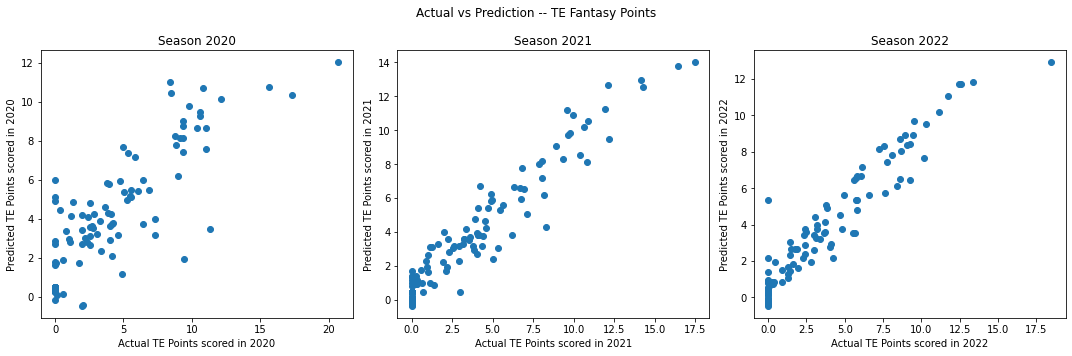

In [158]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- TE Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(te[f'te_prem_pts_pg_5ptd_{year}'], te[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual TE Points scored in {year}')
    ax.set_ylabel(f'Predicted TE Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

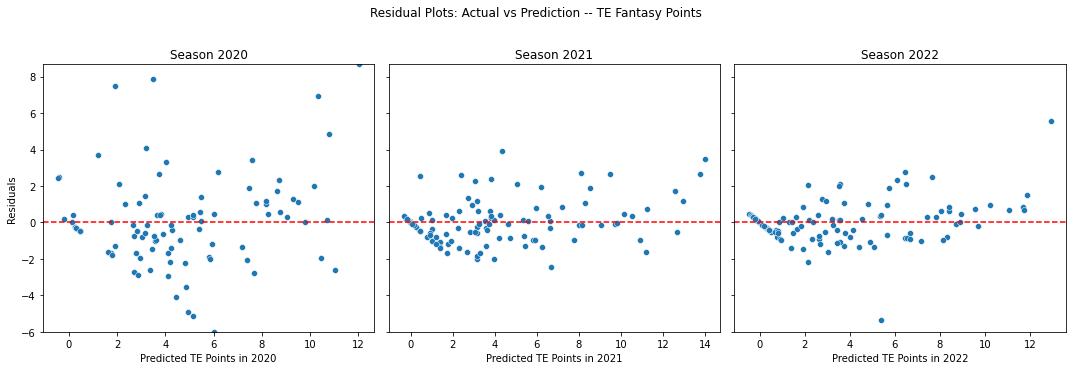

In [159]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = te[f'te_prem_pts_pg_5ptd_{year}'] - te[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- TE Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = te[f'te_prem_pts_pg_5ptd_{year}'] - te[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=te[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted TE Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [162]:
# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

                                     Feature  Importance
0                               ttl_opp_2022    5.320975
9            pts_scored_last_yr_tm_stat_2023    3.227463
10                              ttl_opp_2021    2.203231
1   percent_share_of_intended_air_yards_2022    1.059833
4                      catch_percentage_2022    0.921532
6                                   age_2023    0.679034
14                     catch_percentage_2021    0.622007
8                 passy_last_yr_tm_stat_2023    0.362276
2                               avg_yac_2022    0.320347
3                           yds_per_opp_2022    0.307739
13                          yds_per_opp_2021    0.257952
12                              avg_yac_2021    0.226275
11  percent_share_of_intended_air_yards_2021    0.216318
15                  te_prem_pts_pg_5ptd_2021    0.096990
5                   te_prem_pts_pg_5ptd_2022    0.065735
7                                   adp_2023    0.000000


### Combining Predictions

In [175]:
predictions_23_v1 = pd.concat([qb_preds_1, rb_preds_1, wr_preds_1, te_preds_1], axis =0)

predictions_23_v1['adp_2023'] = pd.to_numeric(predictions_23_v1['adp_2023'], errors='coerce')

In [185]:
# get positional ranks for predictions

predictions_23_v1['pos_pred_rank'] = predictions_23_v1.groupby('pos')['fantasypoints_pg_2023'].rank(method='average', \
                                                               ascending=False, na_option='bottom')


predictions_23_v1['pos_adp_rank'] = predictions_23_v1.groupby('pos')['adp_2023'].rank(method='average', \
                                                               ascending=True, na_option='bottom')

predictions_23_v1['rank_above_or_below'] = predictions_23_v1['pos_adp_rank'] - predictions_23_v1['pos_pred_rank']

predictions_23_v1.sort_values(by = 'adp_2023', inplace = True)
predictions_23_v1.head(15)

,fantasypoints_pg_2023,adp_2023,pos,pos_pred_rank,pos_adp_rank,rank_above_or_below
player_name,,,,,,
Christian McCaffrey,14.180688,1.0,RB,5.0,1.0,-4.0
Austin Ekeler,14.218869,2.0,RB,4.0,2.0,-2.0
Justin Jefferson,15.800294,3.0,WR,3.0,1.0,-2.0
Ja'Marr Chase,14.176175,4.0,WR,10.0,2.0,-8.0
Saquon Barkley,12.350442,5.0,RB,10.0,3.0,-7.0
Jonathan Taylor,10.850141,7.0,RB,18.0,4.0,-14.0
Travis Kelce,12.697732,8.0,TE,1.0,1.0,0.0
Derrick Henry,15.166556,9.0,RB,1.0,5.0,4.0
Nick Chubb,14.728728,10.0,RB,2.0,6.0,4.0


In [186]:
predictions_23_v1.sort_values('rank_above_or_below')

,fantasypoints_pg_2023,adp_2023,pos,pos_pred_rank,pos_adp_rank,rank_above_or_below
player_name,,,,,,
Deshaun Watson,8.304186,107.0,QB,34.0,12.0,-22.0
Najee Harris,9.514500,19.0,RB,31.0,9.0,-22.0
D.K. Metcalf,8.284197,35.0,WR,35.0,14.0,-21.0
Diontae Johnson,6.711782,61.0,WR,44.0,24.0,-20.0
Darren Waller,4.640129,68.0,TE,26.0,7.0,-19.0
Javonte Williams,8.026899,56.0,RB,42.0,23.0,-19.0
Deebo Samuel,9.021454,32.0,WR,31.0,12.0,-19.0
James Cook,7.084556,82.0,RB,47.0,29.0,-18.0
David Montgomery,8.311086,59.0,RB,40.0,24.0,-16.0


In [193]:
ranks_23.head()

,adp,Pos,Team
Name,,,
Christian McCaffrey,1,RB,SF
Austin Ekeler,2,RB,LAC
Justin Jefferson,3,WR,MIN
Ja'Marr Chase,4,WR,CIN
Saquon Barkley,5,RB,NYG


In [195]:
predictions_23_v1 = predictions_23_v1.merge(ranks_23[['Team']], how = 'left', left_index = True, right_index = True)

predictions_23_v1 = predictions_23_v1[predictions_23_v1.columns[2:3].tolist()\
                                      + predictions_23_v1.columns[6:7].tolist() + \
                                      predictions_23_v1.columns[:2].tolist() + \
                                      predictions_23_v1.columns[3:6].tolist()]

In [196]:
predictions_23_v1

,pos,Team,fantasypoints_pg_2023,adp_2023,pos_pred_rank,pos_adp_rank,rank_above_or_below
player_name,,,,,,,
Christian McCaffrey,RB,SF,14.180688,1.0,5.0,1.0,-4.0
Austin Ekeler,RB,LAC,14.218869,2.0,4.0,2.0,-2.0
Justin Jefferson,WR,MIN,15.800294,3.0,3.0,1.0,-2.0
Ja'Marr Chase,WR,CIN,14.176175,4.0,10.0,2.0,-8.0
Saquon Barkley,RB,NYG,12.350442,5.0,10.0,3.0,-7.0
Jonathan Taylor,RB,IND,10.850141,7.0,18.0,4.0,-14.0
Travis Kelce,TE,KC,12.697732,8.0,1.0,1.0,0.0
Derrick Henry,RB,TEN,15.166556,9.0,1.0,5.0,4.0
Nick Chubb,RB,CLE,14.728728,10.0,2.0,6.0,4.0


In [197]:
predictions_23_v1.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/2023_predictions_v1.csv")

<AxesSubplot:>

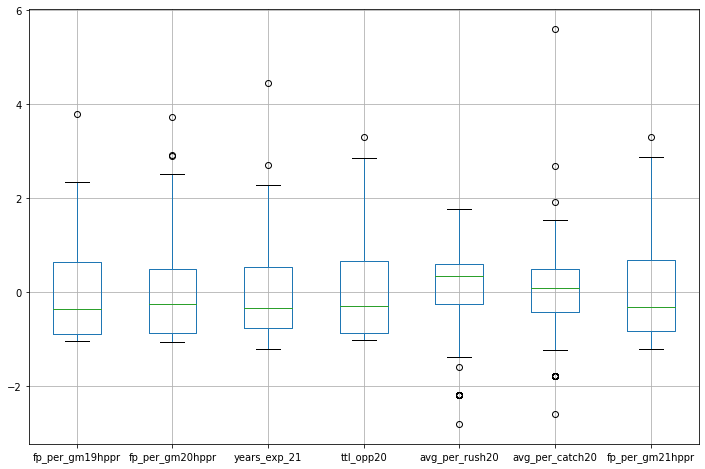

In [251]:
plt.figure(figsize = (12,8))
rb_trans.boxplot()

In [252]:
rb_trans.columns

Index(['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20',
       'avg_per_rush20', 'avg_per_catch20', 'fp_per_gm21hppr'],
      dtype='object')

fp_per_gm, ttl_opp,and years_exp all have right skewed distributions, exponential like.

avg_per_rush has a left skewed distribution. Avg per catch is about normal.

In [253]:
fpg19_trans = stats.yeojohnson(rb_trans['fp_per_gm19hppr'])
fpg20_trans = stats.yeojohnson(rb_trans['fp_per_gm20hppr'])
ye21_trans = stats.yeojohnson(rb_trans['years_exp_21'])
to20_trans = stats.yeojohnson(rb_trans['ttl_opp20'])
fpg21_trans = stats.yeojohnson(rb_trans['fp_per_gm21hppr'])



In [254]:
rb_trans_unskewed = pd.DataFrame([pd.Series(fpg19_trans), pd.Series(fpg20_trans), pd.Series(ye21_trans), 
                                  pd.Series(to20_trans), pd.Series(fpg21_trans)],
                                 columns = ['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'fp_per_gm21hppr'])

In [256]:
rb_trans['fpg19_trans'] = pd.Series(fpg19_trans[0])
rb_trans['fpg20_trans'] = pd.Series(fpg20_trans[0])
rb_trans['ye21_trans'] = pd.Series(ye21_trans[0])
rb_trans['to20_trans'] = pd.Series(to20_trans[0])
rb_trans['fpg21_trans'] = pd.Series(fpg21_trans[0])

<AxesSubplot:>

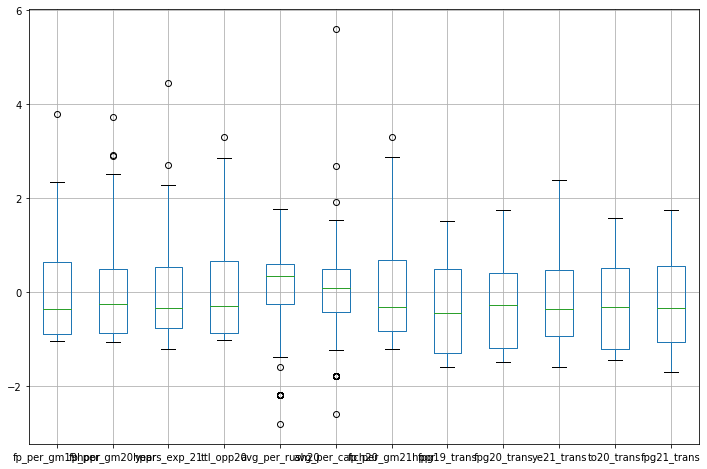

In [257]:
plt.figure(figsize = (12,8))
rb_trans.boxplot()

In [258]:
rb_pp = rb_trans.drop(['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'fp_per_gm21hppr'], axis = 1)

In [259]:
rb_pp


,avg_per_rush20,avg_per_catch20,fpg19_trans,fpg20_trans,ye21_trans,to20_trans,fpg21_trans
0,0.676624,0.828111,0.612516,0.915854,0.779829,0.736543,-0.206703
1,0.246383,-0.275557,0.909995,0.765811,0.472132,1.109273,0.238437
2,0.626496,0.300163,0.081285,0.426331,-0.359406,0.560688,0.634175
3,-2.192612,-1.774410,-1.065761,-1.489014,1.287651,-1.428294,-1.642071
4,-0.248416,0.491843,0.869789,0.094184,1.047986,-0.383040,0.362020
...,...,...,...,...,...,...,...
124,0.123730,-0.484990,-1.294843,-0.521884,-1.593260,-0.628526,-0.570283
125,0.366319,0.085480,-1.294843,-0.878089,-1.593260,-0.801898,-0.727639
126,0.443151,-0.406844,-1.294843,-0.692514,0.104627,-1.021354,0.611544
127,0.161739,1.918020,-1.294843,-0.629125,-1.593260,-1.109932,-0.704624


In [260]:
rb_pp_X = rb_pp.drop(['fpg21_trans'], axis = 1)
rb_pp_y = rb_pp['fpg21_trans']

rb_pp_x_train, rb_pp_x_test, rb_pp_y_train, rb_pp_y_test = train_test_split(rb_pp_X, rb_pp_y, test_size = .25, random_state = 0)

### LINEAR REGRESSION

In [261]:
lin_reg = LinearRegression()

lin_reg.fit(rb_pp_x_train, rb_pp_y_train)

LinearRegression()

In [262]:
lr_pred_test = lin_reg.predict(rb_pp_x_test)
lr_pred_train = lin_reg.predict(rb_pp_x_train)

lr_pred_test

array([ 0.04565147, -0.8995001 , -1.35935225,  0.78911808, -1.1617012 ,
       -0.57737567, -1.16954314, -0.09259256,  0.37836419, -1.09555592,
        0.57769406,  0.45380238, -0.64683291,  1.24896293,  0.19760374,
       -0.26181442,  0.33881409,  0.10094705,  0.0896751 ,  0.14422218,
        0.94817751, -1.23167503, -0.01183887,  0.30318729, -0.68287698,
       -0.64625817, -1.16176251,  0.9149031 , -0.77770382, -0.42332721,
       -1.20907459, -1.2477523 , -1.26902687])

# we may have to transform transformed errors back into normal

### See note below on how to possibly do this

It sounds like you effectively want the geometric standard error, akin to the geometric mean exp(mean(log(x))).

While it might seem reasonable to compute that as:

exp(sd(log(x)/sqrt(n-1)))

You and others have already pointed out that that isn't correct for a few reasons. Instead, use:

exp(mean(log(x))) * (sd(log(x))/sqrt(n-1))


In [263]:
values_lr = ['Logistic Regression', np.sqrt(mean_squared_error(rb_pp_y_train, lr_pred_train)),
         np.sqrt(mean_squared_error(rb_pp_y_test, lr_pred_test))]

values = values.append(pd.Series(values_lr, index = ['Model Type', 'Train Error', 'Test Error']), ignore_index = True)

C:\Users\steph\AppData\Local\Temp/ipykernel_34584/2792587993.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  values = values.append(pd.Series(values_lr, index = ['Model Type', 'Train Error', 'Test Error']), ignore_index = True)


In [264]:
values

,Model Type,Train Error,Test Error
0,Decision Tree,0.000000,0.465304
1,Logistic Regression,0.577881,0.673765
